In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (10,6)


In [20]:
# Load dataset
df = pd.read_csv("../data/superstore.csv", encoding="latin1")

# # Convert date columns
# df['Order Date'] = pd.to_datetime(df['Order Date'])
# df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


Shape: (9994, 13)

Missing Values:
 Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Data Types:
 Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [11]:
df['Profit Margin'] = df['Profit'] / df['Sales']
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125


Key Metrics

In [12]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_quantity = df['Quantity'].sum()
avg_profit_margin = df['Profit Margin'].mean()

print("===== KEY PERFORMANCE INDICATORS =====")
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Quantity Sold: {total_quantity}")
print(f"Average Profit Margin: {avg_profit_margin:.2%}")


===== KEY PERFORMANCE INDICATORS =====
Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Quantity Sold: 37873
Average Profit Margin: 12.03%


Sales by Region

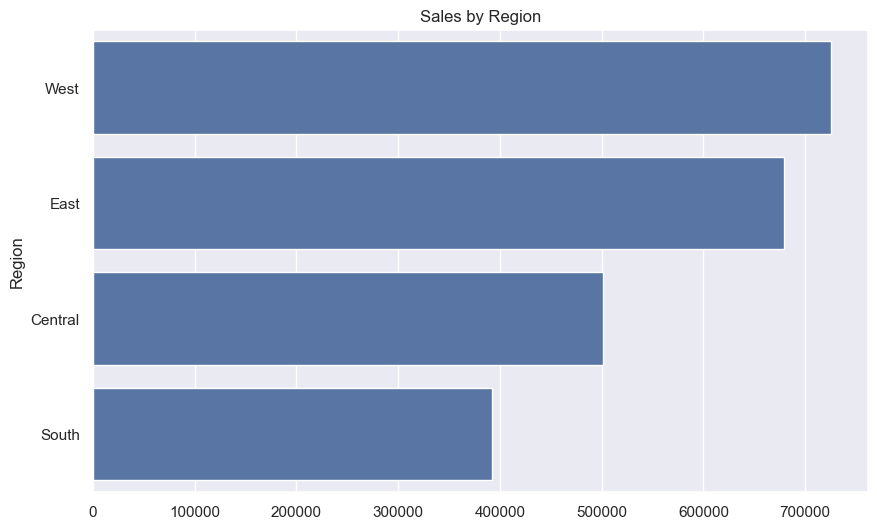

In [13]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

sns.barplot(x=region_sales.values, y=region_sales.index)
plt.title("Sales by Region")

plt.savefig("../outputs/plots/region_sales.png")
plt.show()


Sales by Category

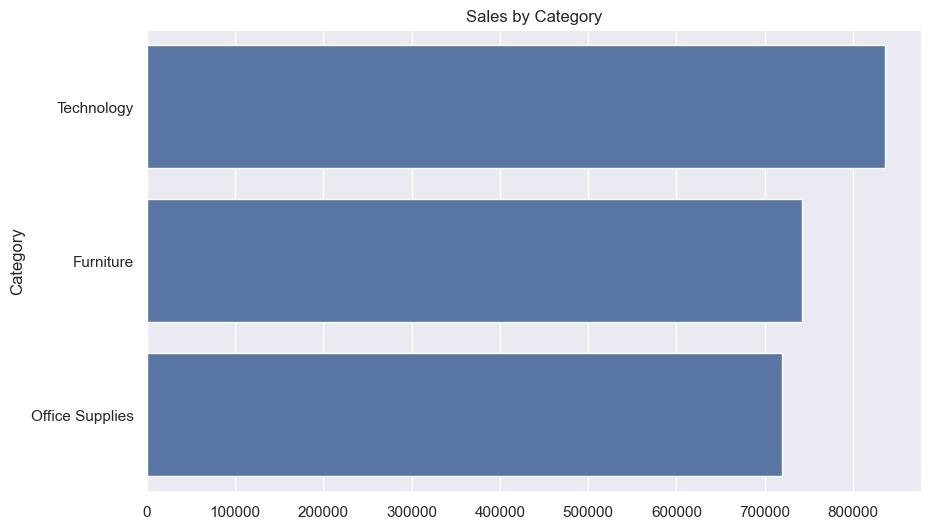

In [14]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title("Sales by Category")

plt.savefig("../outputs/plots/category_sales.png")
plt.show()


PROFITS BY SUB-CATEGORY

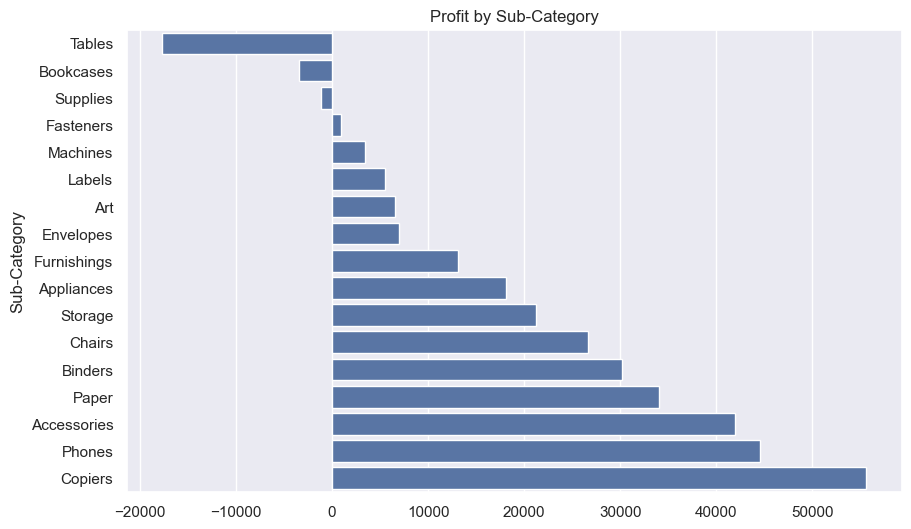

In [15]:
subcat_profit = df.groupby("Sub-Category")["Profit"].sum().sort_values()

sns.barplot(x=subcat_profit.values, y=subcat_profit.index)
plt.title("Profit by Sub-Category")

plt.savefig("../outputs/plots/subcategory_profit.png")
plt.show()


LOSS ANALYSIS

In [16]:
loss_df = df[df['Profit'] < 0]

print("Total Loss Orders:", loss_df.shape[0])

loss_by_category = loss_df.groupby("Category")["Profit"].sum()
print("\nLoss by Category:\n", loss_by_category)


Total Loss Orders: 1871

Loss by Category:
 Category
Furniture         -60936.1090
Office Supplies   -56615.2585
Technology        -38579.9182
Name: Profit, dtype: float64


DISCOUNT VS PROFIT

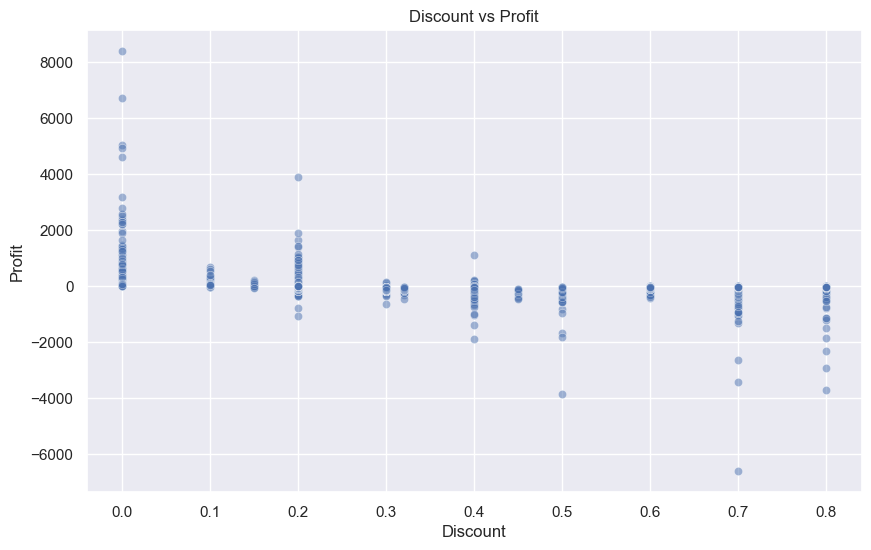

In [17]:
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.5)
plt.title("Discount vs Profit")

plt.savefig("../outputs/plots/discount_vs_profit.png")
plt.show()


SEGMENT ANALYSIS


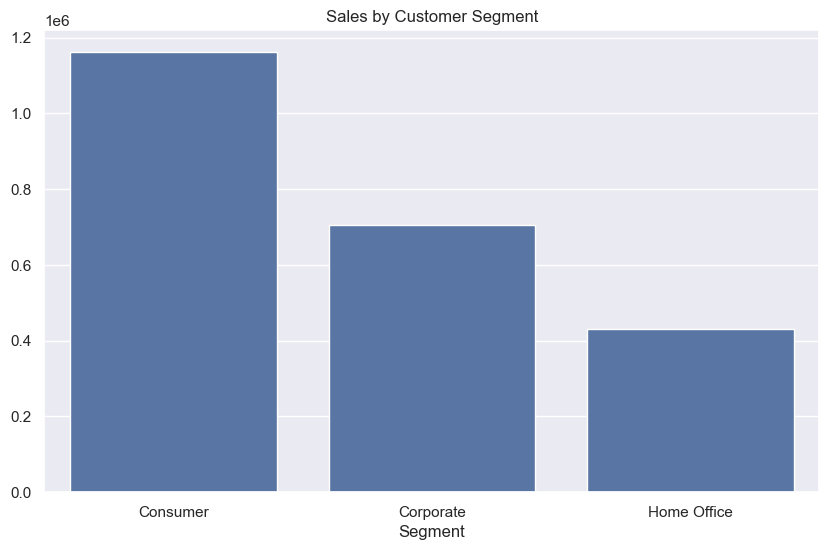

In [18]:
segment_sales = df.groupby("Segment")["Sales"].sum()

sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title("Sales by Customer Segment")

plt.savefig("../outputs/plots/segment_sales.png")
plt.show()


CORRELATION HAETMAP

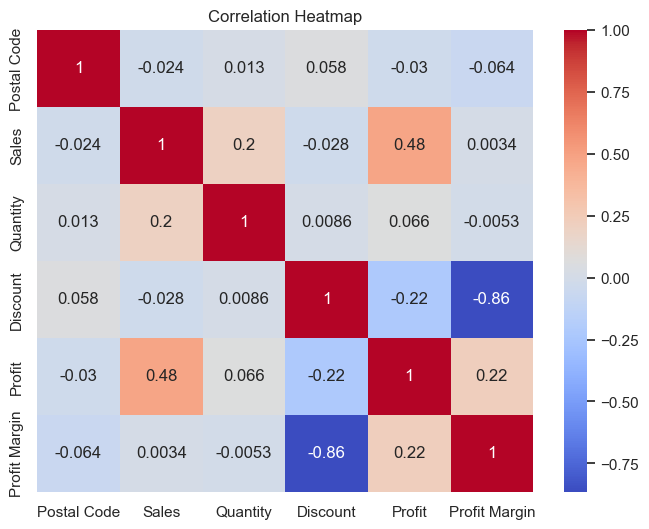

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

plt.savefig("../outputs/plots/correlation_heatmap.png")
plt.show()


## Key Business Insights

1. Certain sub-categories generate consistent losses.
2. High discount levels strongly correlate with reduced profit.
3. Technology category contributes highest revenue.
4. Corporate segment generates strong sales.
5. Some regions perform significantly better than others.
